## **PROJECT-3. Анализ воронки**
<font size="5" color="red"><b>DAPR-1016</b> Pidenko Dmitry</font>

 ЛЕГЕНДА

       Продолжаем работу над мобильной игрой Quiz Freeze.

Коллеги были впечатлены тем, как вы справились с анализом пути пользователей. А ещё до них дошли слухи о том, как вы помогли букмекерской конторе выйти из онлайна в офлайн.

В общем, коллеги вновь обратились  за помощью. На сей раз  необходимо проверить несколько гипотез.

<font size="3" color="green"><b>Гипотеза 1</font>

По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?


<font size="3" color="green"><b>Гипотеза 2</font>

Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

<font size="3" color="green"><b>Гипотеза 3</font>

Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение?

 
 
 
 <font size="5" color="red"><b>**ЦЕЛЬ:**</font>

Исследовать поведение пользователей в обновлённом приложении.

<font size="5" color="red"><b>**ЗАДАЧИ**</font>

В рамках проверки гипотез вам необходимо решить три задачи:

1. Определить, насколько обучение сокращает время прохождения этапов игры.

2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

3. Определить, насколько прозрачен процесс взаимодействия с игрой.

<font size="5" color="red"><b>**КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)**</font>

1. Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.

2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь.
 
3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

<font size="8" color="green"><b>Подготовка данных</font>

*Данные содержатся в двух таблицах*

<font size="5" color="red"><b>1.Загружаем таблицы c данными формата "csv"</font>

In [291]:
import pandas as pd 
# events_df - Хранит данные о событиях, которые совершают пользователи.
events_df = pd.read_csv('data/7_4_Events.csv', sep = ',')
# purchse_df - Хранит данные об оплатах, которые совершают пользователи.
purchase_df = pd.read_csv('data/purchase.csv', sep = ',')

In [292]:
# Копируем данные на тот случай, если что то пойдет не так
events_df = events_df.copy()
purchase_df = purchase_df.copy() 

In [293]:
# Выведем по 10 строк датафрэймов для ознакомления с данными
display(events_df.head(10))
display(purchase_df.head(10))

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585
5,28908,tutorial_start,NaN,2016-05-12T02:11:29,17563.0,12584
6,28909,tutorial_finish,NaN,2016-05-12T02:14:14,17563.0,12584
7,28910,level_choice,hard,2016-05-12T05:30:25,NaN,12584
8,28911,pack_choice,NaN,2016-05-12T05:38:24,NaN,12584
9,28912,tutorial_start,NaN,2016-05-12T07:19:01,17564.0,12583


,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100
5,15679,12989,2016-05-14T02:19:20,200
6,15680,12684,2016-05-14T03:10:14,100
7,15681,12656,2016-05-14T03:42:48,100
8,15682,12624,2016-05-14T06:00:45,50
9,15683,13136,2016-05-14T07:31:03,50


### **Задания будем выполнять с использованием данных пользователей, зарегистрировавшихся в 2018 году (с 1 января по 31 декабря 2018 года включительно).**
### **Скорректируем данные под наше требование**

In [294]:
# Формируем маски для выборки пользователей, зарегистрированных в 2018 году
mask1 = events_df['start_time'] >= '2018-01-01' 
mask2 = events_df['start_time'] < '2019-01-01'
mask3 = events_df['event_type'] == 'registration'
# Урезаем загруженные датасеты, оставляя только данные за 2018 год
users2018 = events_df[mask1&mask2&mask3]['user_id'].to_list()
events_df = events_df[events_df['user_id'].isin(users2018)]
purchase_df = purchase_df[purchase_df['user_id'].isin(users2018)]

### **Оценим характеристики каждого столбца после корректировки датасетов**

In [295]:
display(events_df.describe(include='all'))
display(purchase_df.describe(include='all'))

,id,event_type,selected_level,start_time,tutorial_id,user_id
count,66959.000000,66959,8342,66959,32954.000000,66959.000000
unique,NaN,5,3,66809,NaN,NaN
top,NaN,registration,medium,2018-03-13T09:37:43,NaN,NaN
freq,NaN,19926,4645,9,NaN,NaN
mean,113787.000045,NaN,NaN,NaN,40532.934393,37781.543362
std,19329.542752,NaN,NaN,NaN,5213.486632,5751.497904
min,80308.000000,NaN,NaN,NaN,31505.000000,27832.000000
25%,97047.500000,NaN,NaN,NaN,36008.250000,32849.000000
50%,113787.000000,NaN,NaN,NaN,40529.500000,37719.000000
75%,130526.500000,NaN,NaN,NaN,45057.750000,42733.000000


,id,user_id,event_datetime,amount
count,1600.000000,1600.000000,1600,1600.000000
unique,NaN,NaN,1600,NaN
top,NaN,NaN,2018-01-03T18:53:43,NaN
freq,NaN,NaN,1,NaN
mean,17645.505625,37752.766250,NaN,110.734375
std,462.038637,5822.621784,NaN,54.696628
min,16845.000000,27845.000000,NaN,25.000000
25%,17245.750000,32815.750000,NaN,50.000000
50%,17645.500000,37633.500000,NaN,100.000000
75%,18045.250000,43023.000000,NaN,150.000000


#### **Так как данные содержатся в двух таблицах, целесообразно будет если мы объедим их воедино**

#### **Объединяем датафреймы и присваиваем  имя total_events_df**

In [296]:
# Добавим в датафрейм purchase_df столбец event_type, который будет содержать одно значение - purchase.
# Это нужно, для того чтобы в объединённом датафрейме однозначно выделить события оплаты.
purchase_df['event_type'] = 'purchase'

In [297]:
# Переименуем столбцы id, которые несут различный смысл в исходных датасетах.
# Приведем поле даты события к единому наименованию - start_time  
events_df = events_df.rename(columns={'id': 'event_id'})
purchase_df = purchase_df.rename(columns={
        'id': 'purchase_id', 
        'event_datetime': 'start_time'
    })

### **Соеденим таблицы, приведем столбец с временем к типу DateTime, и сбросим индексы**

In [298]:
# Формируем объединенную таблицу событий - total_events_df
total_events_df = pd.concat([events_df,purchase_df],sort=False)
# Приведем поле start_time к типу DateTime:
total_events_df['start_time'] = pd.to_datetime(total_events_df['start_time'])
# Проведем сброс индексов после объединения, отсортируем события по времени
total_events_df = total_events_df.reset_index(drop=True).sort_values('start_time')
# Проверим содержимое полученной таблицы
total_events_df

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN
...,...,...,...,...,...,...,...,...
68554,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0
68555,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0
68556,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0
68557,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0


<font size="8" color="green"><b>Гипотеза 1</font>

<font size="5" color="red"><b>2.Переведем усредненные величины timedelta в float в масштабе одного часа следующим путем:
переменная / pd.Timedelta('1 hour').Что касаемо визуализации, будем использовать библиотеки seaborn и matplotlob</font>

In [299]:
#создадим сводную  таблицу, где в строках - id пользователя(user_id), в столбцах - этапы событий(event_type),
#значения - минимальное время начало каждого этапа
pivot_df = total_events_df.pivot_table(values='start_time', index='user_id', columns='event_type', aggfunc='min') 

In [300]:
#в сводной таблице возникли мультииндексы, от них нужно избавиться
#Проведем сброс индексов после создание сводной таблицы
pivot_df = pivot_df.reset_index()
pivot_df.columns.name = ''
pivot_df

,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40
...,...,...,...,...,...,...,...
19921,47753,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56
19922,47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT
19923,47755,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14
19924,47756,2019-01-01 05:42:11,2019-01-01 05:50:36,NaT,2018-12-31 23:17:30,2019-01-01 03:29:25,2019-01-01 03:26:18


### **Выше при объединении таблиц, мы изменили тип в столбце с датой на DateTime. Теперь при подсчете разницы во времени  к разнице можно применить: /pd.Timedelta('1 hour') и считать разницу в часах, так подсчет можно выести максимально корректно**

In [301]:
# время от регистрации до начала обучения
pivot_df['delta_tutorial_start'] = (pivot_df['tutorial_start'] - pivot_df['registration'])/ pd.Timedelta('1 hour') 
# время от регистрации до конца обучения
pivot_df['delta_tutorial_finish'] = (pivot_df['tutorial_finish'] - pivot_df['registration'])/ pd.Timedelta('1 hour') 
# время на всю последовательность
pivot_df['delta_all_time'] = (pivot_df['purchase'] - pivot_df['registration'])/ pd.Timedelta('1 hour') 
# время от выбора сложности до окончания обучения
pivot_df['delta_level_choice']=(pivot_df['level_choice']-pivot_df['tutorial_finish'])/pd.Timedelta('1 hour')
# время от выбора сложности до покупки 
pivot_df['delta_pach_choice']=(pivot_df['pack_choice']-pivot_df['level_choice'])/pd.Timedelta('1 hour')
# время на оплату 
pivot_df['delta_purchase']=(pivot_df['purchase']-pivot_df['pack_choice'])/pd.Timedelta('1 hour') 

In [302]:
#пользователи которые начали обучение 
users_with_started_tutorial = set(total_events_df[total_events_df['event_type'] == 'tutorial_start']['user_id'])
#все пользователи
all_users = set(total_events_df['user_id'])
#найдем тех пользователей которые не начинали обучение при помощи функции.difference() которая возвращает установленную разницу двух наборов
not_start_tutorial = all_users.difference(users_with_started_tutorial)
#обозначим тех, кто прошел обучение
tutorial_finished_users = set(total_events_df[total_events_df["event_type"] == "tutorial_finish"]['user_id']) 

In [303]:
#создадим функцию, для выделения нового столбца со следующим условием:
#'FINISHED' - пользователи завершившие
#'NOT_STARTED' - пользователи не начавшие обучение
#'NOT_FINISHED'- пользователи начавщие обучение, но не завершили
def get_tutorial_status(user_id):
    if user_id in tutorial_finished_users:
        return 'FINISHED'
    elif user_id in not_start_tutorial:
        return 'NOT_STARTED'
    else:
        return 'NOT_FINISHED'
pivot_df['user_group']=pivot_df['user_id'].apply(get_tutorial_status)

In [304]:
#отобразим вновьсозданный столбец  
pivot_df['user_group'].value_counts()

user_group
FINISHED        10250
NOT_STARTED      8068
NOT_FINISHED     1608
Name: count, dtype: int64

In [305]:
#сформируем новую переменную и сгруппируем по созданному  столбцу 
#оставим нужные столбцы (подсчитаные ранее дельты) и усредним их
bar_data = pivot_df.groupby(by='user_group', as_index=False)\
[['delta_all_time', 'delta_purchase', 'delta_tutorial_start', 'delta_tutorial_finish', 'delta_level_choice', 'delta_pach_choice']].mean()
bar_data

,user_group,delta_all_time,delta_purchase,delta_tutorial_start,delta_tutorial_finish,delta_level_choice,delta_pach_choice
0,FINISHED,96.500902,89.299900,4.518038,4.721878,2.329711,0.088374
1,NOT_FINISHED,101.548115,93.246363,5.417470,NaN,NaN,0.084804
2,NOT_STARTED,105.100530,100.825997,NaN,NaN,NaN,0.089951


### **Для более корректного отображения данных на графике, необходимо перевернуть сформированную таблицу т.е пересобрать.**

In [306]:
#пересобираем полученную таблицу
bar_data = bar_data.transpose().reset_index()
bar_data.columns = bar_data.iloc[0]
bar_data = bar_data.iloc[1:]
bar_data

,user_group,FINISHED,NOT_FINISHED,NOT_STARTED
1,delta_all_time,96.500902,101.548115,105.10053
2,delta_purchase,89.2999,93.246363,100.825997
3,delta_tutorial_start,4.518038,5.41747,NaN
4,delta_tutorial_finish,4.721878,NaN,NaN
5,delta_level_choice,2.329711,NaN,NaN
6,delta_pach_choice,0.088374,0.084804,0.089951


## **Визуализируем данные**

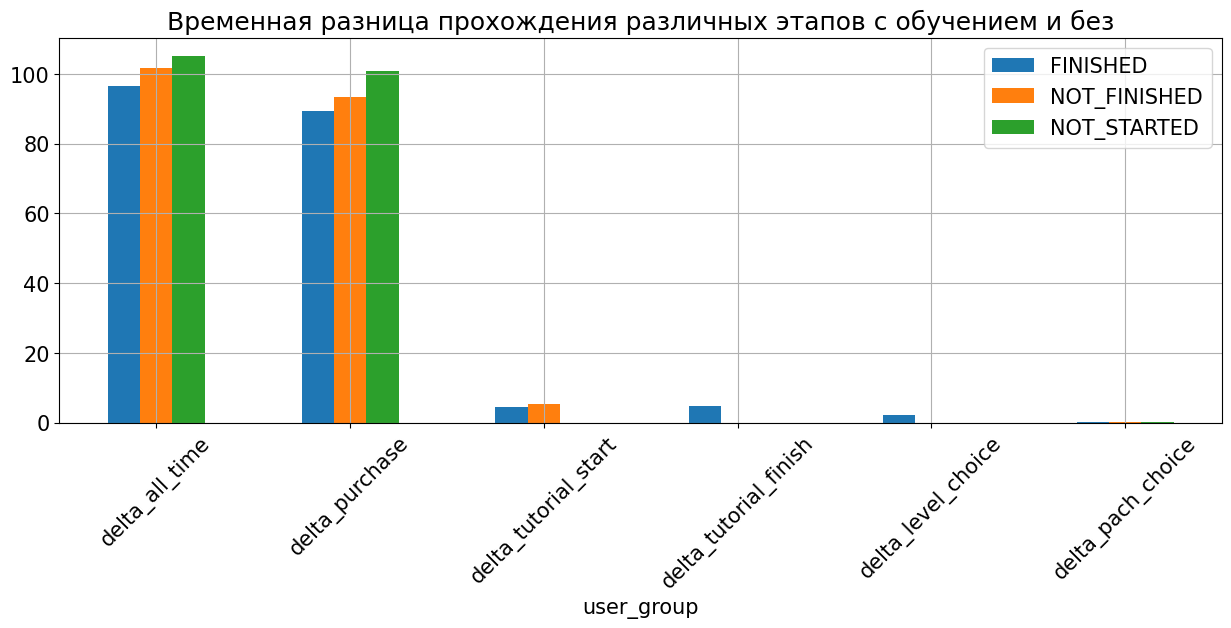

In [307]:
#построение столбчатой диаграммы, отражающей время прохождения различных этапов для пользователей, которые прошли обучение, 
#и для пользователей, не начинавших обучение.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '15'
bar_data.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    x='user_group',
    rot=45,
    fontsize=15,
    title='Временная разница прохождения различных этапов с обучением и без'

 )
plt.legend(['FINISHED', 'NOT_FINISHED', 'NOT_STARTED'])
plt.show()

## **Вывод:**

Из столбчатой диаграммы наглядно видно, что время прохождения игры у пользователей которые прошли обучение меньше. 
После обучения пользователи проходят всю цепочку за 96,5 часов в среднем, в отличие от пользователей, которые не проходили обучение, их путь больше.  Группа пользователей, которая не закончила обучение проходит все этапы за 101 час.  Переход от уровня сложности до выбора пакета вопросов у всех групп примерно одинаковый.. Но если глобально посмотреть на результат, то можно говорить о том, что приложение довольно таки практичное и не вызывает особых сложностей у пользователей.  Этап обучения способствует более быстрому прохождению всех этапов, учитывая, что в среднем пользователь на него тратит 12 минут, а экономит при этом почти 9 часов.

<font size="8" color="green"><b>Гипотеза 2</font>

<font size="5" color="red"><b>3.У нас будет две таблицы, одна с количеством начинаний обучений, другая с количеством закачиваний обучений.  Нам необходимо сгруппировать данные и сагрегировать таким образом, чтобы по каждому количеству было количество пользователей, и сколько из них оплатило (перешло в статус клиента можно сказать). Таким образом мы сможем вычислить конверсию в покупку еще одним столбцом. И далее визуализируем у двух таблиц эту конверсию, сравним два графика и сделаем вывод.</font>

In [308]:
#Разделим пользователей на группы по количеству стартов обучения
tutorial_start_df = total_events_df[total_events_df['event_type'] == 'tutorial_start']
start_group = tutorial_start_df.groupby(['user_id'])['event_type'].count().sort_values(ascending=False)
user_start_group = tutorial_start_df['user_id'].unique()
start_group_count = start_group.value_counts().sort_index()

#Выделим пользователей из группы начавших обучение и перешедших в клиенты
purchase_start = total_events_df[(total_events_df['event_type'] == 'purchase') & (total_events_df['user_id'].isin(user_start_group))]['user_id']

display(start_group_count)
display(purchase_start)

event_type
1    9103
2    1589
3     427
4     221
5     109
6     116
7      94
8      86
9     113
Name: count, dtype: int64

66959    27845
66960    27865
66961    27911
66962    27910
66963    27940
         ...  
68554    47498
68555    47647
68556    47554
68557    47742
68558    47732
Name: user_id, Length: 1578, dtype: int64

In [309]:
#Разделим пользователей на группы по количеству завершений обучения
tutorial_finish_df = total_events_df[total_events_df['event_type'] == 'tutorial_finish']
finish_group = tutorial_finish_df.groupby(['user_id'])['event_type'].count().sort_values(ascending=False)
user_finish_group = tutorial_finish_df['user_id'].unique()
finish_group_count = finish_group.value_counts().sort_index()

#Выделим пользователей из группы завершивших обучение и перешедших в клиенты
purchase_finish = total_events_df[(total_events_df['event_type'] == 'purchase') & (total_events_df['user_id'].isin(user_finish_group))]['user_id']

display(finish_group_count)
display(purchase_finish)

event_type
1    8015
2    1321
3     345
4     178
5     117
6     101
7      97
8      54
9      22
Name: count, dtype: int64

66959    27845
66962    27910
66963    27940
66965    27981
66966    27969
         ...  
68554    47498
68555    47647
68556    47554
68557    47742
68558    47732
Name: user_id, Length: 1447, dtype: int64

In [310]:
#Создаем дубликат для дальнейших расчетов
total_events_copy = total_events_df.copy()

In [311]:
#Создаем функцию для подсчета начавших обучения
def count_start_tutorial(row):
    if row['event_type'] == 'tutorial_start':
        return 1
#Создаем функцию для завершений обучения 
total_events_copy['count_tutorial_start'] = total_events_copy.apply(count_start_tutorial, axis=1)

In [312]:
#Создаем функцию для подсчета завершений обучения
def count_finish_tutorial(row):
    if row['event_type'] == 'tutorial_finish':
        return 1
#Создаем функцию для завершений обучения 
total_events_copy['count_tutorial_finish'] = total_events_copy.apply(count_finish_tutorial, axis=1)

In [313]:
#Создаем функцию для подсчета клиентов
def count_client(x):
    if x['event_type']=='purchase':
        return 1
#Добавляем счетчик клиентов
total_events_copy['count_client'] = total_events_copy.apply(count_client, axis=1) 

In [314]:
#Создаем функцию для подсчета пользователей
def count_users(x):
    if x['event_type']=='registration':
        return 1
#Добавляем счетчик пользователей
total_events_copy['count_users'] = total_events_copy.apply(count_users, axis=1) 

### **В версиях программ от 1.5 - 2.0 в агрегированую функцию к примеру sum() необходимо добавлять функцию numeric_only=True, т.к по умолчаюнию установлено False**

In [315]:
#Создаем новый датафрейм
group1_df = total_events_copy.groupby(by='user_id').sum(numeric_only=True)
group1_df['count_users'] = 1
#Агрегируем данные по количеству начайших обучений
group1_final_start = group1_df.groupby(by='count_tutorial_start').sum(numeric_only=True) 
group1_final_start = group1_final_start.drop(['event_id', 'tutorial_id', 'purchase_id'], axis=1)
#Считаем конверсию
group1_final_start['conversion']=(group1_final_start['count_client']*100/group1_final_start['count_users']).round(2) 
group1_final_start

,amount,count_tutorial_finish,count_client,count_users,conversion
count_tutorial_start,,,,,
0.0,2825.0,0.0,22.0,8068,0.27
1.0,132475.0,7548.0,1207.0,9103,13.26
2.0,24950.0,2655.0,218.0,1589,13.72
3.0,5675.0,1031.0,51.0,427,11.94
4.0,2950.0,719.0,30.0,221,13.57
5.0,1950.0,428.0,16.0,109,14.68
6.0,1675.0,557.0,14.0,116,12.07
7.0,1325.0,558.0,12.0,94,12.77
8.0,1350.0,572.0,13.0,86,15.12


### **В версиях программ от 1.5 - 2.0 в агрегированую функцию к примеру sum() необходимо добавлять функцию numeric_only=True, т.к по умолчаюнию установлено False**

In [316]:
#Создаем новый датафрейм
group2_df = total_events_copy.groupby(by='user_id').sum(numeric_only=True)
group2_df['count_users'] = 1
#Агрегируем данные по количеству завершений обучений
group2_final_finish = group2_df.groupby(by='count_tutorial_finish').sum(numeric_only=True) 
group2_final_finish = group2_final_finish.drop(['event_id', 'tutorial_id', 'purchase_id'], axis=1)
#Считаем конверсию
group2_final_finish['conversion']=(group2_final_finish['count_client']*100/group2_final_finish['count_users']).round(2) 
group2_final_finish

,amount,count_tutorial_start,count_client,count_users,conversion
count_tutorial_finish,,,,,
0.0,16575.0,1663.0,153.0,9676,1.58
1.0,126025.0,8537.0,1143.0,8015,14.26
2.0,20625.0,2891.0,182.0,1321,13.78
3.0,5475.0,1217.0,44.0,345,12.75
4.0,1950.0,842.0,19.0,178,10.67
5.0,1950.0,732.0,19.0,117,16.24
6.0,1625.0,725.0,15.0,101,14.85
7.0,1750.0,775.0,15.0,97,15.46
8.0,800.0,470.0,6.0,54,11.11


## **Визуализируем данные** 

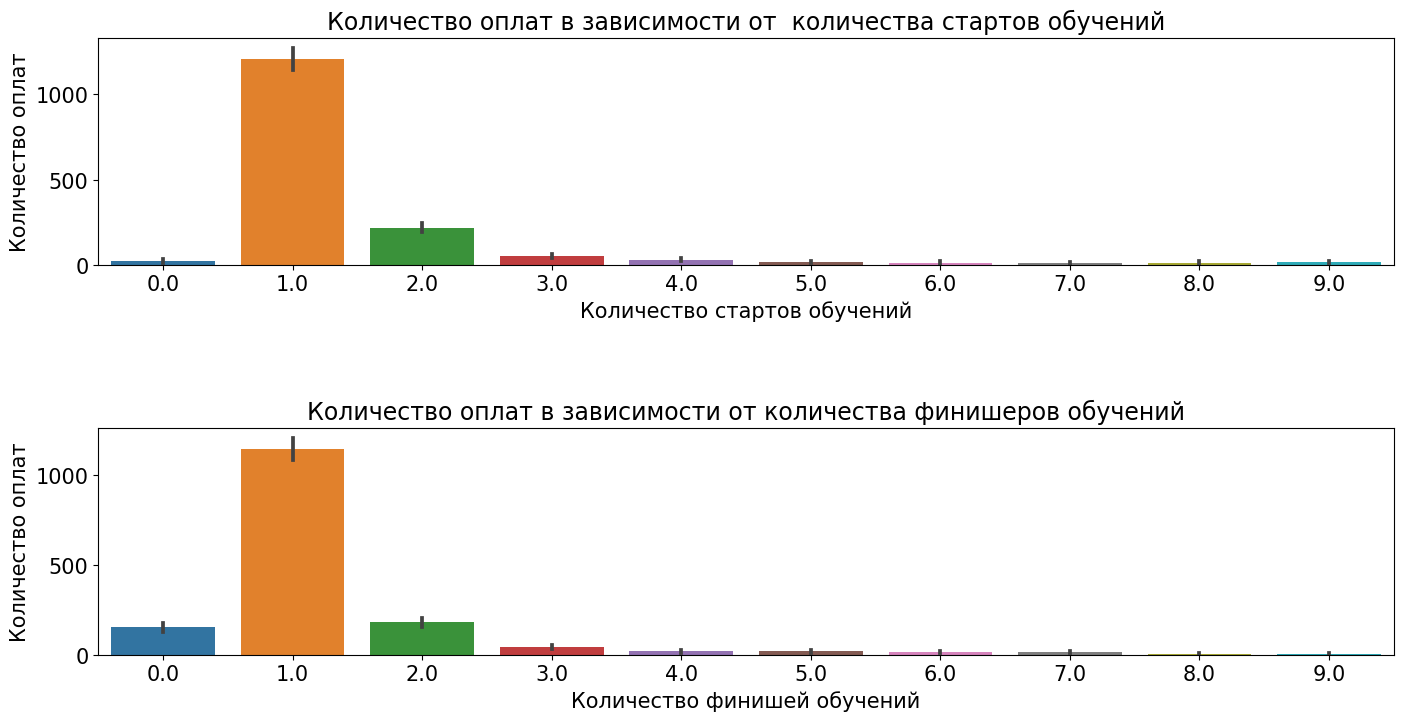

In [317]:
#построение графиков по количеству начавших и завершивших обучения
#импортируем дополнительные библиотеки для построения столбчатых диаграмм 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=1,  figsize=(14,7))
fig.tight_layout (h_pad=6)
sns.barplot(data = group1_df, ax=axes[0], x='count_tutorial_start', y='amount', estimator = 'count_nonzero')
#старт
axes[0].set_title('Количество оплат в зависимости от  количества стартов обучений', fontsize=17)
axes[0].set_xlabel('Количество стартов обучений', fontsize=15)
axes[0].set_ylabel('Количество оплат', fontsize=15)
#финиш
sns.barplot(data = group2_df, ax=axes[1], x='count_tutorial_finish', y='amount', estimator = 'count_nonzero')
axes[1].set_title('Количество оплат в зависимости от количества финишеров обучений', fontsize=17)
axes[1].set_xlabel('Количество финишей обучений', fontsize=15)
axes[1].set_ylabel('Количество оплат', fontsize=15);

## **Вывод:**

В процессе анализа участвовало 10 групп, где 0: по-питоновски означает 1-ая группа - не закончившие обучение, а с 1 по 9 - по количеству закончавшие  обучение. Как видно из графиков зависимости между вероятностью оплаты вопросов и количеством обучений, которые начинали или завершали пользователи-нет. Однако мы видим, что при примерно одинаковой конверсии, среди разных групп пользователей (которые начинали обучение и заканчивали обучение от 1 до 9 группы), чаще всего клиентами становятся те, кто один раз прошел обучение. Клиенты проходившие обучение более одного раза, меньше всего доходят до покупки.С чем это связано? Предполагаю, что пользователи которые проходили обучение более одного раза являются контингентом за 40, потому что большенство населения именно этого возраста одалены чувством страха о произведении какой-либо оплаты тем более онлайн. Либо люди просто не считают целосообразным производить покупку, потому что ом достаточно безплатных вопросов. В любом случаи как бы это не звучало, для бизнеса это вредно. Предлагаю уменьшить количество попыток прохождения обучения до 1 раза с возможностью продолжить обучение, если вдруг по какой-либо причине обучение было приостановлено. Для более детального анализа, в данных не помешал бы столбецы о возрастной категорией и регионах где проводился эксперимент.

<font size="8" color="green"><b>Гипотеза 3</font>

<font size="5" color="red"><b>4. Разделим пользователей по группам (пользователи, выбравшие уровень сложности и пользователи, начавшие обучение), для каждой группы найдем количество уникальных пользователей и сформируем соответствующие датафреймы по группам пользователей для последующего объединения (для этого произведем замену названия колонки с временем события). Объединим датасеты. Введем признак разницы во времени 'timedelta' между стартом обучения и выбором уровня сложности. Создадим дополнительный датафрейм, отфильтровав только положительные значения 'timedelta'. Определим  количество и процент пользователей, вернувшихся к обучению после выбора уровня сложности. Построим диаграмму и сделаем вывод.</font>

In [318]:
#Создаем датасет с событием level_choice
level_choice_df = total_events_df [total_events_df['event_type'] == 'level_choice'][['user_id','start_time']]
level_choice_df = level_choice_df.rename(columns= {'start_time':'level_choice_time'})
level_choice_df['level_choice_time']=pd.to_datetime(level_choice_df['level_choice_time']) 
#Создаем датасет с временем события start_time и level_choice_time 
tutorial_start_level_choise_df = tutorial_start_df.merge(level_choice_df, on='user_id', how='inner')
tutorial_start_level_choise_df['time_delta'] = \
    tutorial_start_level_choise_df['start_time'] - tutorial_start_level_choise_df['level_choice_time']
print(tutorial_start_level_choise_df)

       event_id      event_type selected_level          start_time   
0       80316.0  tutorial_start            NaN 2018-01-01 15:00:51  \
1       80323.0  tutorial_start            NaN 2018-01-01 19:11:36   
2       80337.0  tutorial_start            NaN 2018-01-02 02:07:07   
3       80338.0  tutorial_start            NaN 2018-01-02 03:03:44   
4       80349.0  tutorial_start            NaN 2018-01-02 07:08:00   
...         ...             ...            ...                 ...   
12681  147236.0  tutorial_start            NaN 2018-12-31 07:14:38   
12682  147242.0  tutorial_start            NaN 2018-12-31 10:21:11   
12683  147253.0  tutorial_start            NaN 2018-12-31 20:54:56   
12684  147260.0  tutorial_start            NaN 2019-01-01 00:08:14   
12685  147262.0  tutorial_start            NaN 2019-01-01 03:26:18   

       tutorial_id  user_id  purchase_id  amount   level_choice_time   
0          31506.0    27835          NaN     NaN 2018-01-01 20:37:22  \
1          3150

In [319]:
#Посчитаем разницу между временем выбора уровня и временем начала обучения(time_delta)
#Если разница отрицаельная, значит обучение началось после выбора уровня
#Пользователи, прошедшие обучение после выбора уровня сложности   
users_tutorial_after_level_choice = tutorial_start_level_choise_df[tutorial_start_level_choise_df['time_delta']>'1 seconds']['user_id'].nunique()
print('')
print('Пользователи, прошедшие обучение после выбора уровня сложности', users_tutorial_after_level_choice) 

users_tutorial_before_level_choice = tutorial_start_level_choise_df[ tutorial_start_level_choise_df\
 ['time_delta']<pd.Timedelta(0)]['user_id'].nunique()
#Пользователи, прошедшие обучение до выбора уровня сложности
print('Пользователи, прошедшие обучение до выбора уровня сложности', users_tutorial_before_level_choice)


Пользователи, прошедшие обучение после выбора уровня сложности 1386
Пользователи, прошедшие обучение до выбора уровня сложности 8244


In [320]:
#Посчитаем соотношение прошедших обучение после выбора уровня сложности к прошедшим обучение до выбора уровня сложности
percent_users_tutorial_after_level_choice = users_tutorial_after_level_choice / users_tutorial_before_level_choice*100
print('Соотношение прошедших обучение после выбора уровня сложности к прошедшим обучение до выбора уровня сложности',\
    round(percent_users_tutorial_after_level_choice,1))

Соотношение прошедших обучение после выбора уровня сложности к прошедшим обучение до выбора уровня сложности 16.8


## **Визуализируем данные**

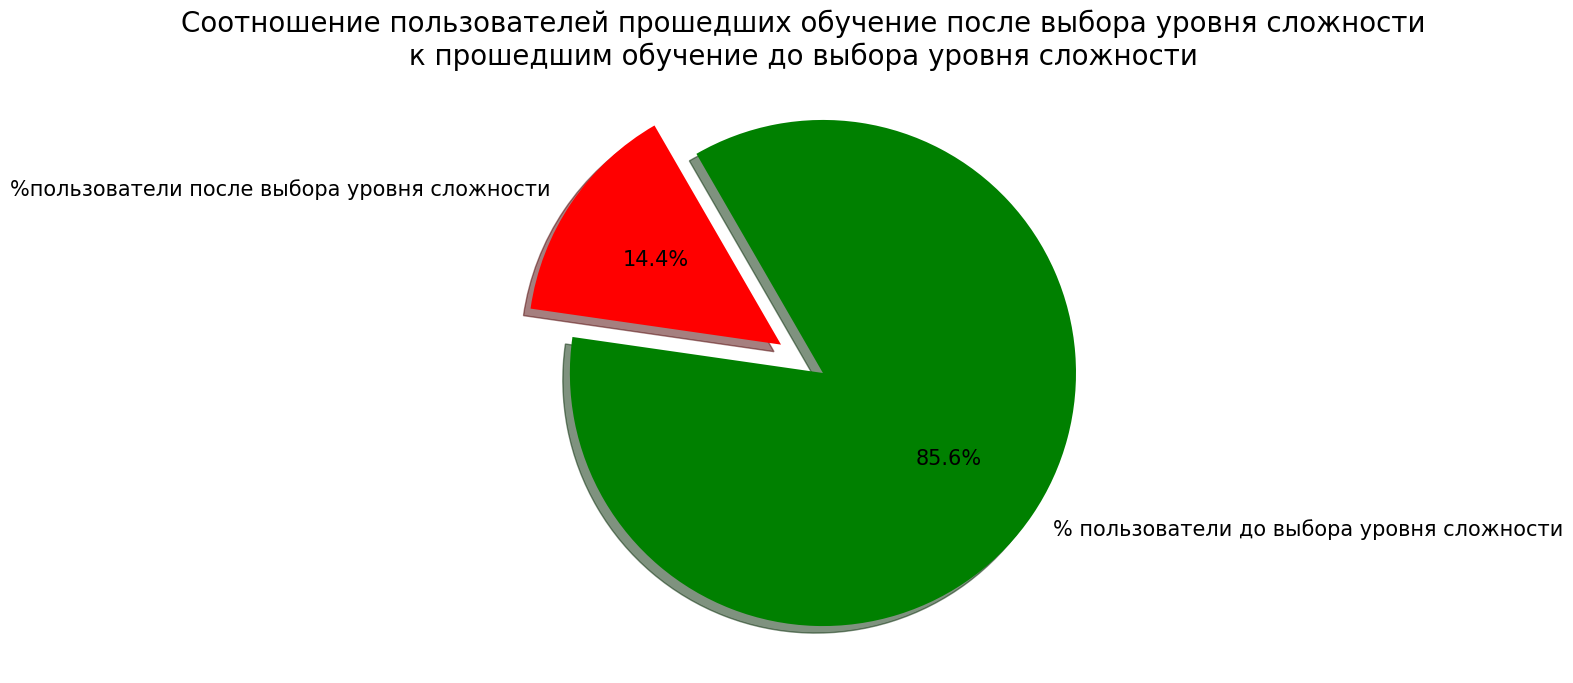

In [321]:
#если ранее не выгружалась библиотека для построения круговой диаграммы 
#импортируем библиотеку
import matplotlib.pyplot as plt
tutorial_start_level_choise_df = [users_tutorial_after_level_choice, users_tutorial_before_level_choice]
labels = ['%пользователи после выбора уровня сложности', '% пользователи до выбора уровня сложности']
fig = plt.figure(figsize=(6,6))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    tutorial_start_level_choise_df, 
    labels = labels, 
    colors = ( "red", "green"),
    shadow = True,  
    autopct='%1.1f%%',
    startangle=120, 
    explode = [0.2, 0])

axes.set_title('Соотношение пользователей прошедших обучение после выбора уровня сложности\n к прошедшим обучение до выбора уровня сложности ', fontsize=20)
plt.axis('equal')
plt.show()

## **Вывод:**

 Был произведен расчет пользователей, которые прошли  обучение после выбора уровня сложности, их уникальное количество составляет 1386 человек, а также пользователей которые прошли обучение до выбора уровня сложности, их уникальное количество составляет 8244 человек. В процентном соотношении это составляет 16.8%. Из груговой диаграммы можно увидеть, что процент пользователей которые прошли обучение после выбора сложности, в 6 раз меньше тех, кто прошел убучение до выбора уровня сложности. Из этого наблюдения можно предположить, что приложение довольно таки практичное и не составляет большого труда с ним взаимодействовать. 

<font size="8" color="green"><b>Общий вывод:</font>

1. Времени на прохождения игры занимает меньше у тех пользователей, которые проходят обучение нежели остальных групп, участвовавших в наблюдении

2. Зависимости между вероятностью оплаты и количеством обучений не выявлено. Однако факт окончания или начала обучения значительно повышает вероятность оплаты.

3. Процент пользователей которые прошли обучение после выбора сложности, в 6 раз меньше тех, кто прошел убучение до выбора уровня сложности.

